In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from fbprophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/testset.csv")

In [ ]:
data.head()

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


In [ ]:
data.tail()

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
100985,20170424-06:00,Haze,17.0,0,0,NaN,25.0,NaN,1005.0,0,0,34.0,0,0,4.0,320.0,NW,NaN,NaN,11.1
100986,20170424-09:00,Haze,14.0,0,0,NaN,16.0,NaN,1003.0,0,0,38.0,0,0,4.0,320.0,NW,NaN,NaN,22.2
100987,20170424-12:00,Haze,12.0,0,0,NaN,14.0,NaN,1002.0,0,0,36.0,0,0,4.0,270.0,West,NaN,NaN,18.5
100988,20170424-15:00,Haze,15.0,0,0,NaN,27.0,NaN,1004.0,0,0,32.0,0,0,2.0,320.0,NW,NaN,NaN,3.7
100989,20170424-18:00,Haze,15.0,0,0,NaN,30.0,NaN,1005.0,0,0,30.0,0,0,2.0,320.0,NW,NaN,NaN,3.7


In [ ]:
data['datetime_utc']=pd.to_datetime(data['datetime_utc'])

In [ ]:
data.set_index("datetime_utc", inplace= True)
data

,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
datetime_utc,,,,,,,,,,,,,,,,,,,
1996-11-01 11:00:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1996-11-01 12:00:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
1996-11-01 13:00:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
1996-11-01 14:00:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
1996-11-01 16:00:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-04-24 06:00:00,Haze,17.0,0,0,NaN,25.0,NaN,1005.0,0,0,34.0,0,0,4.0,320.0,NW,NaN,NaN,11.1
2017-04-24 09:00:00,Haze,14.0,0,0,NaN,16.0,NaN,1003.0,0,0,38.0,0,0,4.0,320.0,NW,NaN,NaN,22.2
2017-04-24 12:00:00,Haze,12.0,0,0,NaN,14.0,NaN,1002.0,0,0,36.0,0,0,4.0,270.0,West,NaN,NaN,18.5


In [ ]:
data=data.resample('D').mean()

In [ ]:
data

,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wgustm,_windchillm,_wspdm
datetime_utc,,,,,,,,,,,,,,,,,
1996-11-01,11.666667,0.0,0.0,NaN,52.916667,NaN,-2659.666667,0.0,0.0,22.333333,0.0,0.0,2.250000,23.333333,NaN,NaN,2.466667
1996-11-02,10.458333,0.0,0.0,NaN,48.625000,NaN,1009.833333,0.0,0.0,22.916667,0.0,0.0,3.476190,106.666667,NaN,NaN,8.028571
1996-11-03,12.041667,0.0,0.0,26.80,55.958333,NaN,1010.500000,0.0,0.0,21.791667,0.0,0.0,2.286364,106.666667,NaN,NaN,4.804545
1996-11-04,10.222222,0.0,0.0,27.50,48.055556,NaN,1011.333333,0.0,0.0,22.722222,0.0,0.0,2.326667,55.555556,NaN,NaN,1.964706
1996-11-05,8.200000,0.0,0.0,NaN,29.400000,NaN,1011.800000,0.0,0.0,27.800000,0.0,0.0,3.900000,208.000000,NaN,NaN,10.020000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-04-20,16.750000,0.0,0.0,NaN,27.500000,NaN,998.625000,0.0,0.0,34.500000,0.0,0.0,2.500000,216.666667,NaN,NaN,5.562500
2017-04-21,21.500000,0.0,0.0,NaN,39.375000,NaN,999.875000,0.0,0.0,34.250000,0.0,0.0,2.000000,92.500000,NaN,NaN,6.962500
2017-04-22,20.400000,0.0,0.0,38.05,40.900000,NaN,1001.600000,0.0,0.0,32.900000,0.2,0.0,1.950000,113.750000,NaN,NaN,8.890000


In [ ]:
data = data[[' _tempm']]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7480 entries, 1996-11-01 to 2017-04-24
Freq: D
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0    _tempm  7336 non-null   float64
dtypes: float64(1)
memory usage: 116.9 KB


In [ ]:
data.isnull().any()

 _tempm    True
dtype: bool

In [ ]:
data.reset_index(inplace= True)

In [ ]:
data.reset_index(inplace= True)

In [ ]:
data.rename(columns = {'datetime_utc':'ds',' _tempm':'y'},inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
data.head()

,index,ds,y
0,0,1996-11-01,22.333333
1,1,1996-11-02,22.916667
2,2,1996-11-03,21.791667
3,3,1996-11-04,22.722222
4,4,1996-11-05,27.800000


In [ ]:
data["ds"]

0      1996-11-01
1      1996-11-02
2      1996-11-03
3      1996-11-04
4      1996-11-05
          ...    
7475   2017-04-20
7476   2017-04-21
7477   2017-04-22
7478   2017-04-23
7479   2017-04-24
Name: ds, Length: 7480, dtype: datetime64[ns]

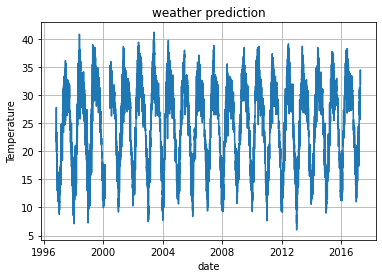

In [ ]:
plt.plot(data["ds"],data["y"])
plt.xlabel("date")
plt.ylabel("Temperature")
plt.title("weather prediction")
plt.grid()

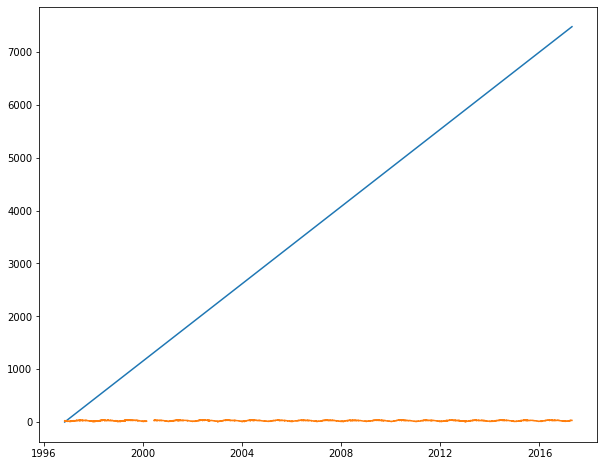

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(data.set_index(["ds"]))

In [ ]:
model = Prophet()

In [ ]:
model.fit(data)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = model.make_future_dataframe(periods=365,freq="D")
future.tail()

,ds
7840,2018-04-20
7841,2018-04-21
7842,2018-04-22
7843,2018-04-23
7844,2018-04-24


In [ ]:
forecast = model.predict(future)

In [ ]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1996-11-01,23.453558,18.158805,24.044371,23.453558,23.453558,-2.311939,-2.311939,-2.311939,-0.055625,-0.055625,-0.055625,-2.256314,-2.256314,-2.256314,0.0,0.0,0.0,21.141619
1,1996-11-02,23.455739,18.061809,23.971982,23.455739,23.455739,-2.430675,-2.430675,-2.430675,-0.003902,-0.003902,-0.003902,-2.426773,-2.426773,-2.426773,0.0,0.0,0.0,21.025064
2,1996-11-03,23.457920,18.011426,23.929405,23.457920,23.457920,-2.634321,-2.634321,-2.634321,-0.035810,-0.035810,-0.035810,-2.598512,-2.598512,-2.598512,0.0,0.0,0.0,20.823598
3,1996-11-04,23.460100,17.913276,23.663315,23.460100,23.460100,-2.778079,-2.778079,-2.778079,-0.005989,-0.005989,-0.005989,-2.772089,-2.772089,-2.772089,0.0,0.0,0.0,20.682021
4,1996-11-05,23.462281,17.669149,23.589117,23.462281,23.462281,-2.966283,-2.966283,-2.966283,-0.018300,-0.018300,-0.018300,-2.947984,-2.947984,-2.947984,0.0,0.0,0.0,20.495997


In [ ]:
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
7840,2018-04-20,32.870839,29.943391,35.762705
7841,2018-04-21,33.080475,30.156707,35.948591
7842,2018-04-22,33.204865,30.366103,36.034239
7843,2018-04-23,33.389337,30.387850,36.283588
7844,2018-04-24,33.529919,30.682241,36.345254


In [ ]:
forecast[['ds','yhat','yhat_lower','yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,1996-11-01,21.141619,18.158805,24.044371
1,1996-11-02,21.025064,18.061809,23.971982
2,1996-11-03,20.823598,18.011426,23.929405
3,1996-11-04,20.682021,17.913276,23.663315
4,1996-11-05,20.495997,17.669149,23.589117


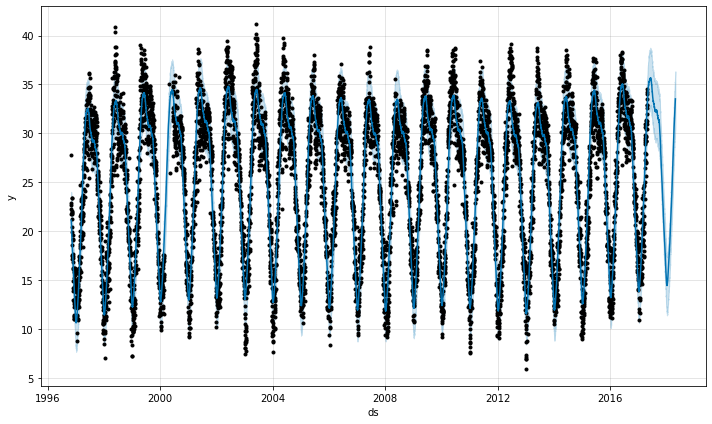

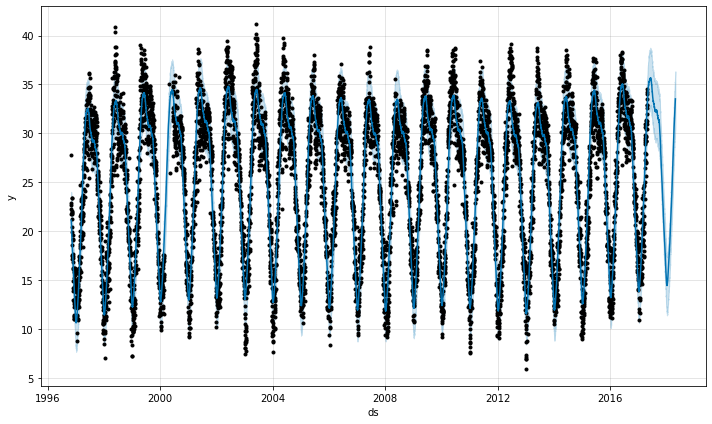

In [ ]:
model.plot(forecast)

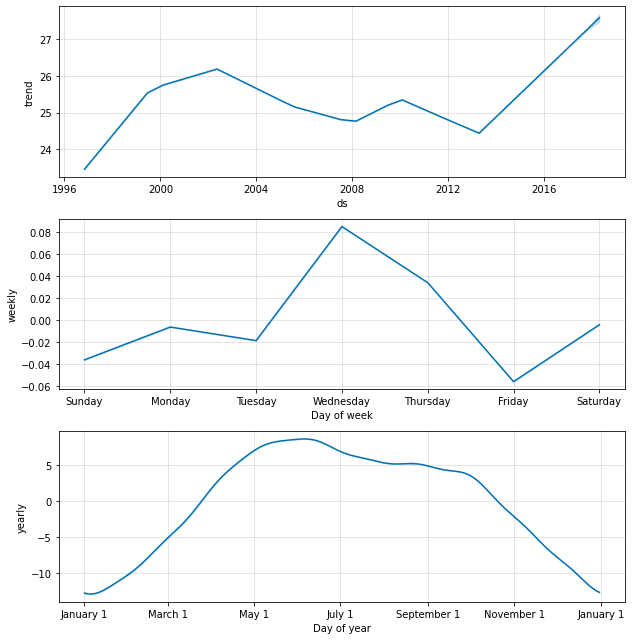

In [ ]:
fig = model.plot_components(forecast)

In [ ]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(model,initial='730 days',period='180 days',horizon='365 days')
df_cv.head()

INFO:fbprophet:Making 36 forecasts with cutoffs between 1999-01-24 00:00:00 and 2016-04-24 00:00:00


  0%|          | 0/36 [00:00<?, ?it/s]

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1999-01-25,13.603535,10.727701,16.486007,13.20,1999-01-24
1,1999-01-26,13.782692,10.807449,16.514465,10.00,1999-01-24
2,1999-01-27,14.008863,11.052872,17.013705,17.75,1999-01-24
3,1999-01-28,14.002936,10.984734,17.129984,11.75,1999-01-24
4,1999-01-29,13.807375,11.041891,16.929212,11.20,1999-01-24


In [ ]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,37 days,6.353443,2.520604,1.991261,0.098243,0.072675,0.779525
1,38 days,6.406046,2.531017,2.000916,0.098518,0.072675,0.777839
2,39 days,6.485397,2.546644,2.014856,0.098821,0.073306,0.772429
3,40 days,6.520371,2.553502,2.018452,0.098734,0.074147,0.772257
4,41 days,6.588956,2.566896,2.024598,0.098452,0.074383,0.770553


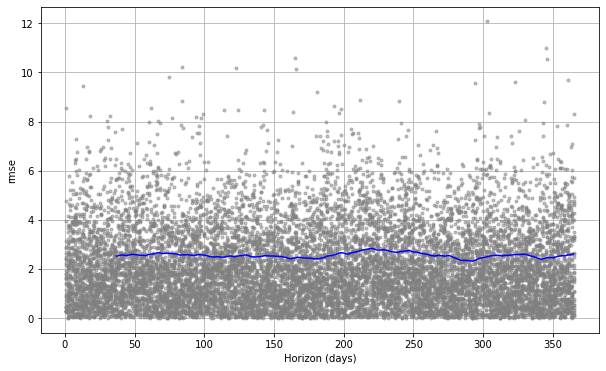

In [ ]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv,metric='rmse')

In [ ]:
import pickle
pickle.dump(model,open("weather_prediction.pickle","wb"))